In [11]:
pip install scikit-learn'

zsh:1: unmatched '
Note: you may need to restart the kernel to use updated packages.


In [8]:
import pandas as pd

# Replace 'your_file.csv' with the path to your CSV file
df = pd.read_csv('comments.csv')

# Display the first few rows of the dataframe
df.head()

,Comment,Label
0,CM has dementia,Health
1,Lost close family member,Bereavement
2,"Struggling with mental health issues, cannot use",Health
3,Advised that father passed away,Bereavement
4,Lost job recently and now working part time,Loss of income


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the data
tfidf_matrix = vectorizer.fit_transform(df['Comment'])

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())


In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the Count Vectorizer
count_vectorizer = CountVectorizer()

# Fit and transform the data
count_matrix = count_vectorizer.fit_transform(df['Comment'])

# Convert the count matrix to a DataFrame for better readability
count_df = pd.DataFrame(count_matrix.toarray(), columns=count_vectorizer.get_feature_names_out())


In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(count_df, df['Label'], test_size=0.2, random_state=42)

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict the labels on the testing set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model's performance
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.25


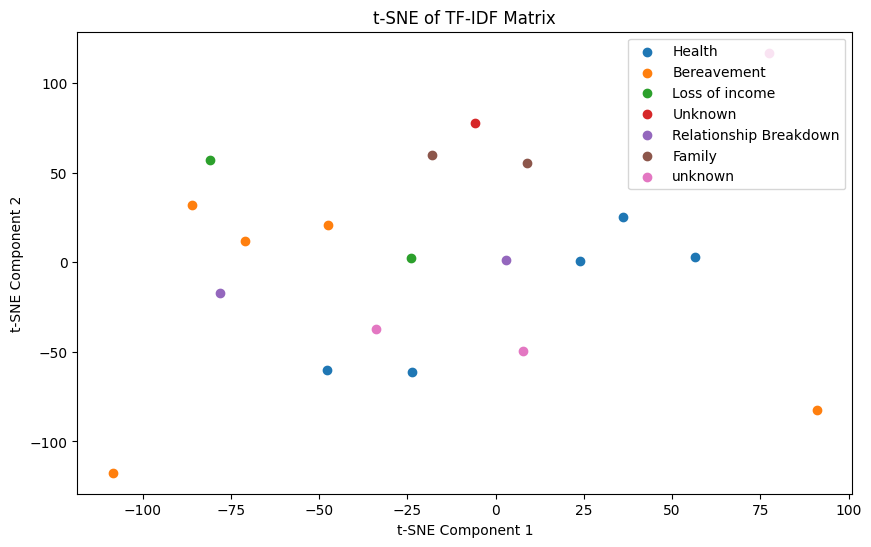

In [26]:
from sklearn.manifold import TSNE

# Initialize the t-SNE model
tsne = TSNE(n_components=2, perplexity=10,random_state=42)

# Fit and transform the TF-IDF matrix
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for the t-SNE results
tsne_df = pd.DataFrame(tsne_results, columns=['TSNE1', 'TSNE2'])
tsne_df['Label'] = df['Label']

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
for label in tsne_df['Label'].unique():
    subset = tsne_df[tsne_df['Label'] == label]
    plt.scatter(subset['TSNE1'], subset['TSNE2'], label=label)

plt.title('t-SNE of TF-IDF Matrix')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.show()

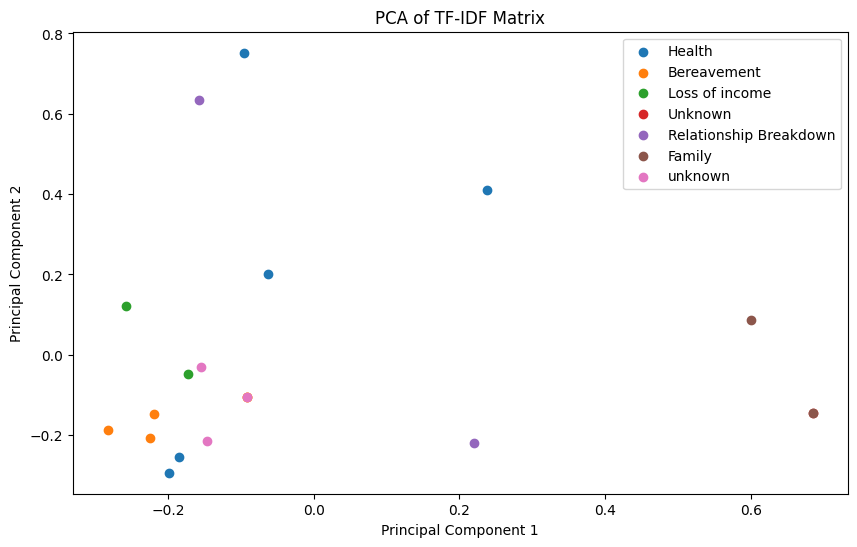

In [18]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# Reduce the dimensionality of the TF-IDF matrix to 2 components using PCA
pca = PCA(n_components=2)
tfidf_pca = pca.fit_transform(tfidf_matrix.toarray())

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(tfidf_pca, columns=['PC1', 'PC2'])
pca_df['Label'] = df['Label']

# Plot the PCA results
plt.figure(figsize=(10, 6))
for label in pca_df['Label'].unique():
    subset = pca_df[pca_df['Label'] == label]
    plt.scatter(subset['PC1'], subset['PC2'], label=label)

plt.title('PCA of TF-IDF Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()